In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [8]:
Zoo=pd.read_csv('/content/Zoo.csv')
zoo=Zoo.iloc[:,1:]
zoo

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


EDA

In [5]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [6]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
zoo.isnull().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

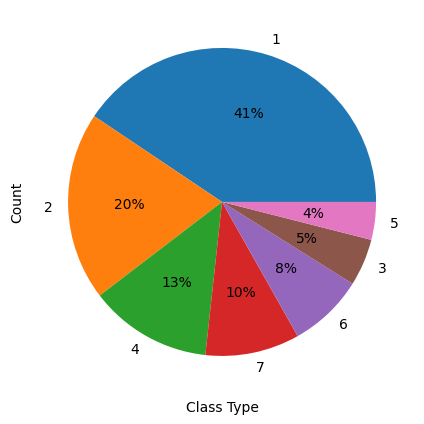

In [10]:
plt.figure(figsize=(5,5));
zoo.type.value_counts().plot(kind="pie",autopct='%1.0f%%');
plt.title=("Class wise plot");
plt.xlabel('Class Type');
plt.ylabel("Count");
plt.plot();

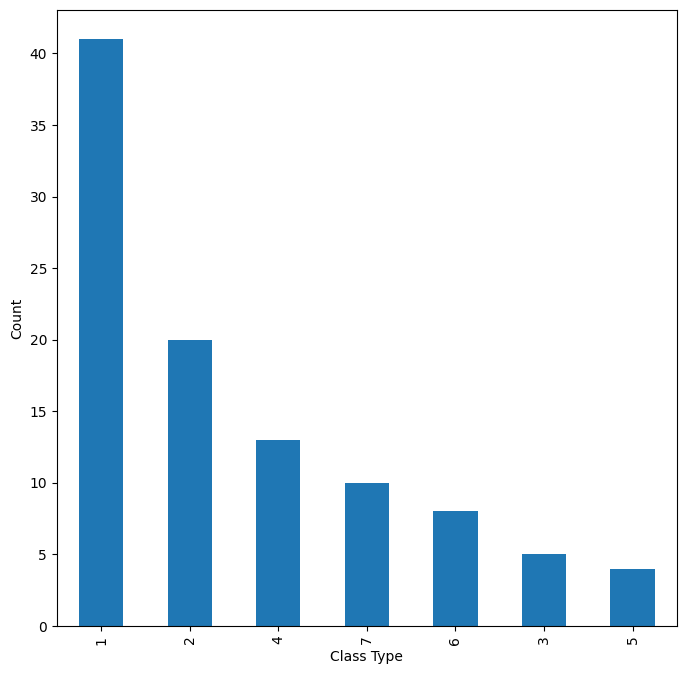

In [12]:
# Class wise animal counts.
# We can see, mostly animals belong to the class 1 which is Mammal.
plt.figure(figsize=(8,8));
Zoo.type.value_counts().plot(kind="bar");
plt.title=("Class wise plot");
plt.xlabel('Class Type');
plt.ylabel("Count");
plt.plot();

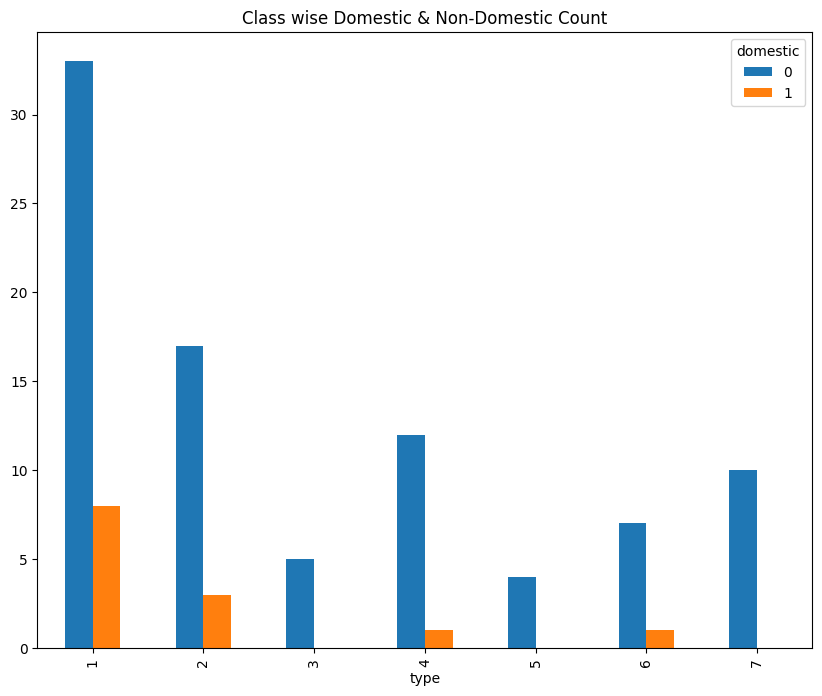

In [13]:
# Lets see species wise domestic and non-domestic animals

pd.crosstab(zoo.type,zoo.domestic).plot(kind="bar", figsize=(10, 8), title="Class wise Domestic & Non-Domestic Count");
plt.plot();

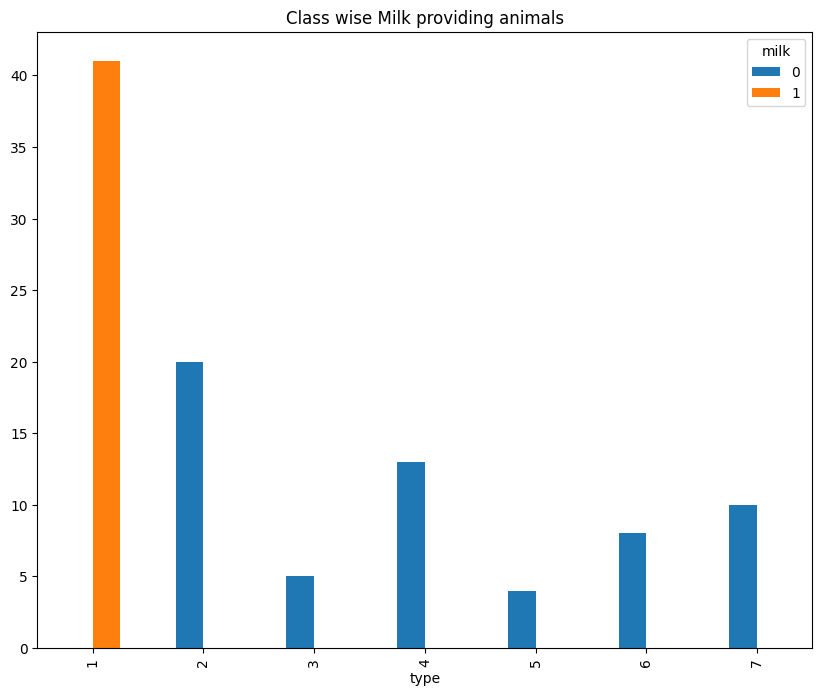

In [14]:
pd.crosstab(zoo.type, zoo.milk).plot(kind="bar", title="Class wise Milk providing animals", figsize=(10, 8));

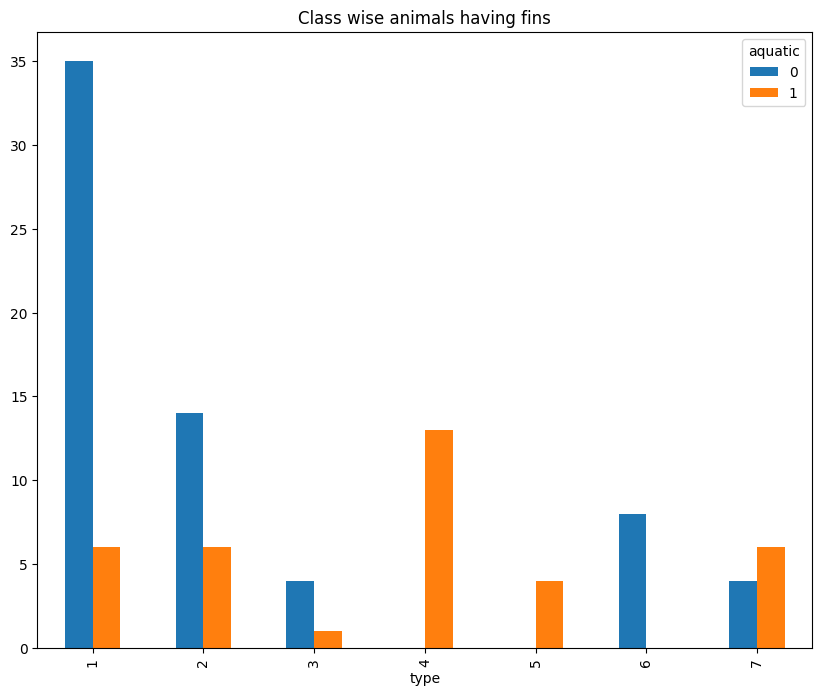

In [15]:
# Lets plot category wise animals having fins
pd.crosstab(zoo.type, zoo.aquatic).plot(kind="bar",title="Class wise animals having fins", figsize=(10, 8));

<Axes: xlabel='type'>

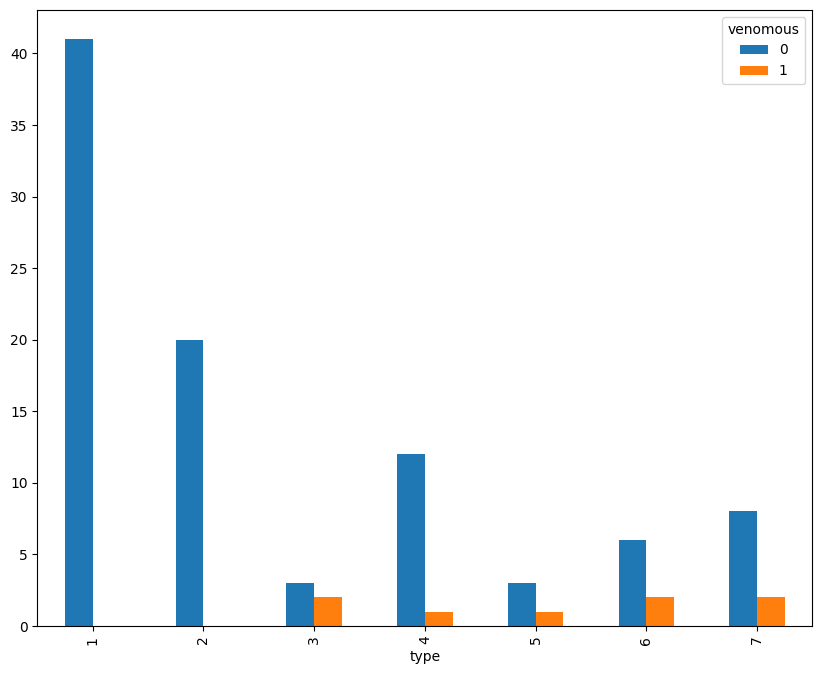

In [16]:
# As per our data we have 2 repltiles which are venomous and , 1 fish and other class types
pd.crosstab(zoo.type, zoo.venomous).plot(kind="bar", figsize=(10, 8))

<Axes: >

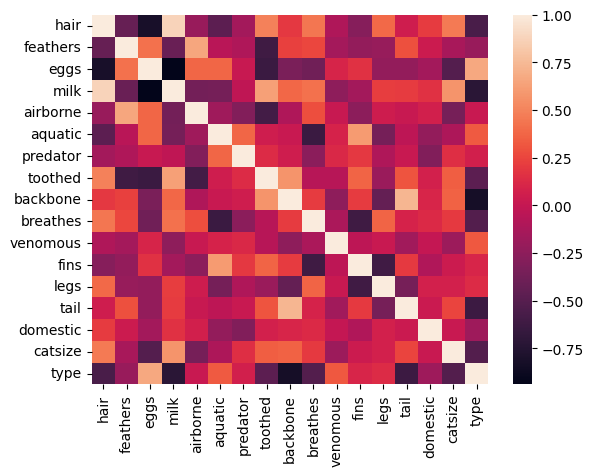

In [17]:
cor = zoo.corr()
sns.heatmap(cor)

split train & test data

In [18]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(zoo,test_size=0.3,random_state=0)

KNN

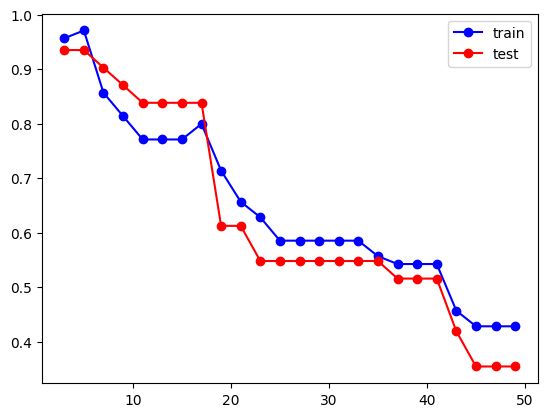

In [19]:
from sklearn.neighbors import KNeighborsClassifier as KNC
#to find best k value
acc=[]
for i in range(3,50,2):
    neigh=KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:16],train.iloc[:,16])
    train_acc=np.mean(neigh.predict(train.iloc[:,0:16])==train.iloc[:,16])
    test_acc=np.mean(neigh.predict(test.iloc[:,0:16])==test.iloc[:,16])
    acc.append([train_acc,test_acc])
    
plt.plot(np.arange(3,50,2),[i[0] for i in acc],'bo-')
plt.plot(np.arange(3,50,2),[i[1] for i in acc],'ro-')
plt.legend(['train','test'])


Model Building

In [20]:
neigh=KNC(n_neighbors=5)
neigh.fit(train.iloc[:,0:16],train.iloc[:,16])
train_acc=np.mean(neigh.predict(train.iloc[:,0:16])==train.iloc[:,16])
test_acc=np.mean(neigh.predict(test.iloc[:,0:16])==test.iloc[:,16])
train_acc
test_acc

0.9354838709677419

K-Fold Validation

In [21]:
array = zoo.values
X = array[:,0:8]
Y = array[:,8]

In [23]:
# num_folds = 10
kfold = KFold(n_splits=10)


In [26]:
model = KNeighborsClassifier(n_neighbors=12)
results = cross_val_score(model,X,Y,cv=kfold)  #cross_val_score - Passes the array of accuracies

In [25]:
print(results.mean())

0.9199999999999999
